In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import requests
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
#data_url = "https://raw.githubusercontent.com/Suraj192/project_data_tidy/master/ECN_QC1.csv?token=AOEVDBXSMFYR46UEXPAA6DS7YZUKE"

In [3]:
data = pd.read_csv("ECN_QC1.csv")

In [4]:
data.head()

,SITECODE,SDATE,FIELDNAME,VALUE
0,T01,17-JAN-1996,ALUMINIUM,0.288
1,T01,17-JAN-1996,CALCIUM,5.170
2,T01,17-JAN-1996,CHLORIDE,7.900
3,T01,17-JAN-1996,CONDY,87.000
4,T01,17-JAN-1996,DOC,8.500


# Introduction

We may have heard in our life time about the acid rain and its adverse effect on the ecosystem. Considering this fact, may studies about acidic deposition have been carried out since the year 1970. These studies is a source to highlight subsequent impacts on the ecosystem due to the deposition of atmospherically transported pollutants. 

The imported data in this project is also related with the deposition of atmospheric pollutants. The source of data is UK Environmental Change Network. This contains the eleven different site's ongauge measurement of composition of different chemical for the sampling day (Date in which the sample is collected).


In [5]:
value_table = {"Name of Chemical": 
               ["pH", "Conductivity", "Alkalinity", "Other Chemicals"], 
               "Units": 
               ["pH scale", "uS/cm", "mg/l", "mg/l"] }

In [6]:
Unit_table= pd.DataFrame(value_table)

In [7]:
Unit_table

,Name of Chemical,Units
0,pH,pH scale
1,Conductivity,uS/cm
2,Alkalinity,mg/l
3,Other Chemicals,mg/l


# Unit table
Each chemical composition is describe with the value column. But it is obvious that with single column, it is difficult to describe the units of measurement. To understand the measurement unit of each chemical, unit dataframe was created. 

Other chemicals includes:
- $Na^+$, $K^+$, $Ca^{2+}$, $Mg^{2+}$, $Fe^{2+}$, $Al^{3+}$, $PO_4^{3-}-P$, $NH_4^{+}-N$, $Cl^-$, $NO_3^--N$, $SO_4^{2-}-S$

Chemicals which falls under the other chemicals category is measured in mg/l unit.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60450 entries, 0 to 60449
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SITECODE   60450 non-null  object 
 1   SDATE      60450 non-null  object 
 2   FIELDNAME  60450 non-null  object 
 3   VALUE      60450 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


# Data Info

Our dataframe includes four different columns. First column is the sitecode, where eleven different site was given with the code range from T1 to T11. Our data has not the continous date. It is because, only the date when the sample is taken from each site is taken into consideration. Furthermore we have the fieldname as the data column which specify the name of chemicals composition in the sample. Last column is the value column which specify the amount of chemical present in the sample. We can consider data points we have is 60450 because in this case each row identically specify one data point. Our data at this point, has zero missing values. 

In [9]:
sum(data["VALUE"]==0)

934

In [10]:
# Assign d1 as a copy of data[data["VALUE"]==0] to avoid upcoming warning
# d1 = data[data["VALUE"]==0].copy()
d1 = data[data["VALUE"]==0]

In [11]:
d1["SDATE"]= d1["SDATE"].astype("datetime64") 

<ipython-input-11-4392ded3155b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1["SDATE"]= d1["SDATE"].astype("datetime64")


In [12]:
d1.groupby("FIELDNAME").sum()

,VALUE
FIELDNAME,
ALKY,0.0
ALUMINIUM,0.0
CALCIUM,0.0
CHLORIDE,0.0
COLOUR,0.0
CONDY,0.0
DOC,0.0
IRON,0.0
MAGNESIUM,0.0


In [13]:
d2 = d1.reset_index()

In [14]:
df1 = pd.DataFrame(d2.FIELDNAME.value_counts())
df1.reset_index(level = 0, inplace = True)

In [15]:
df1.head(2)

,index,FIELDNAME
0,ALKY,355
1,COLOUR,226


/home/vu/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


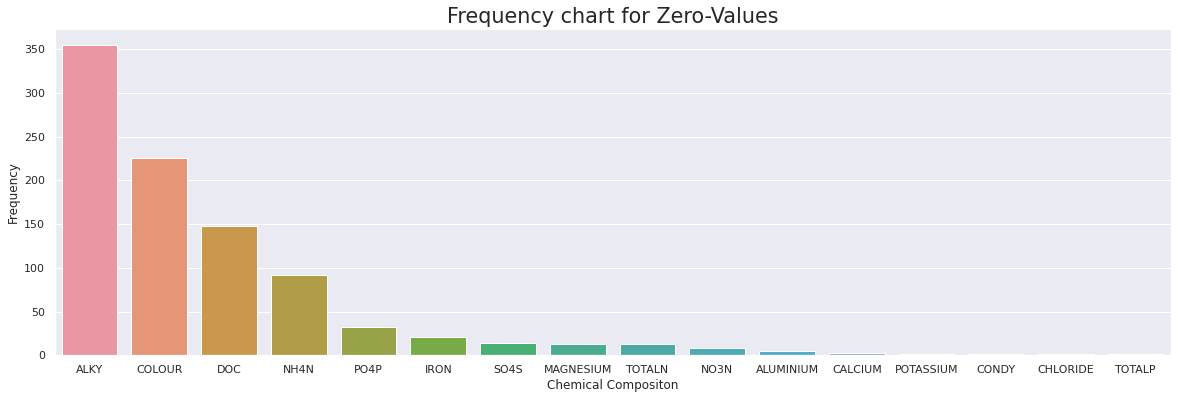

In [16]:
fig=plt.figure(figsize = (20,6))
sns.barplot(df1["index"], df1["FIELDNAME"])
plt.title("Frequency chart for Zero-Values", fontsize="xx-large" )
plt.xlabel("Chemical Compositon")
plt.ylabel("Frequency")
plt.show()


## Null values
So far, from our data info we do not have missing value. But while checking the existence of chemical compostion of zero value we have 934 data points with value equal to zero and with most of the chemical composition's value is zero at some instance. With these 934 zero data points our first question was will these zero value affect our analysis if replaced with Nan values? Before going to that question, let's review our frequency table of zero value data. Highest occurance of zero value is experienced in the fieldname "ALKY"-alkalinity which is 355 whereas least value of occurance was 1 which was for phosphorous, potassium, condy* and chloride. 

In [17]:
original_freq = pd.DataFrame(data["FIELDNAME"].value_counts())
original_freq.reset_index(level = 0, inplace = True)



In [18]:
original_freq

,index,FIELDNAME
0,SO4S,4063
1,CHLORIDE,4033
2,NO3N,4011
3,PO4P,3945
4,SODIUM,3938
5,CALCIUM,3938
6,MAGNESIUM,3931
7,POTASSIUM,3930
8,NH4N,3858
9,PH,3289


Further reviewing the data, field name with higher zero value has lower frequency in the total datasets. In precise we can say that, field name "ALKY" has 355 zeros out of 586, followed by field name "COLOUR" which has 226 zero values out of 236. Simlarly, the frequency of other fieldname with zero value is very less to that of original(actual data) frequency of field name. Similarly, if we consider the actual definition of alkalinity i.e., if alkalinity of substance is zero then the substance is no longer capable of dissolving the acid. We may consider for a while that the alkalinity may be zero but since we already have value of pH with us, there is a high chance of data conflict between pH and alkalinity at the point where alkalinity is zero. Upto this point, we are discussing about the consequences if we anlayse the data with zero value. Now, let's consider if we drop the zero value from our datasets. In this case, number of observation will be low. Mean and median we obtained from the will increase than that or original dataset. Figure below is the will show the bar diagram of frequency of fieldname of original datasets. Further down is the calculation of median and mean of original data set according to chemical's name respectively.

/home/vu/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


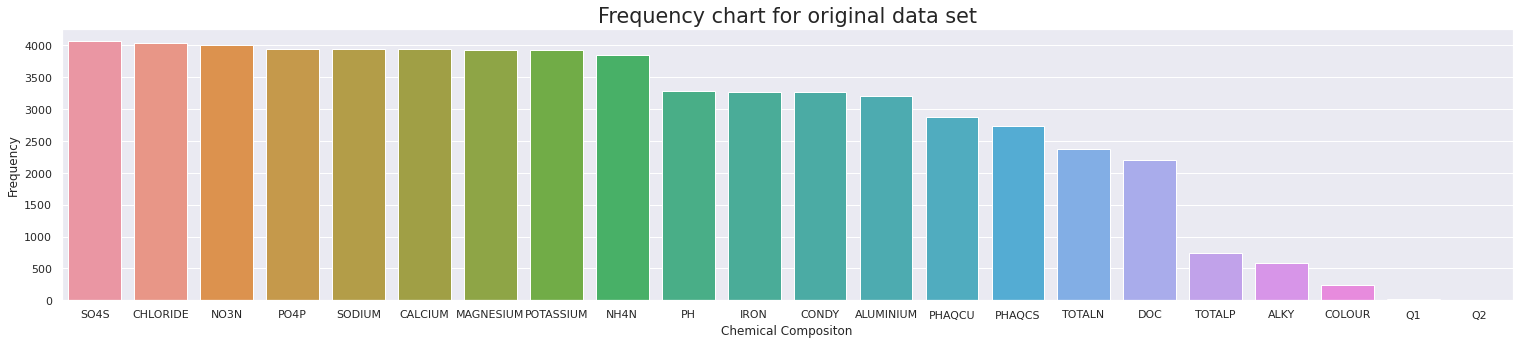

In [19]:
fig=plt.figure(figsize = (26,5))
sns.barplot(original_freq["index"], original_freq["FIELDNAME"])
plt.title("Frequency chart for original data set", fontsize="xx-large" )
plt.xlabel("Chemical Compositon")
plt.ylabel("Frequency")
plt.show()

In [20]:
# grouping by original data frame with fieldname in its mean value
data_medianchemical = data.groupby("FIELDNAME").median()

In [21]:
data_medianchemical

,VALUE
FIELDNAME,
ALKY,0.0000
ALUMINIUM,0.3400
CALCIUM,4.2200
CHLORIDE,10.7590
COLOUR,0.0000
CONDY,62.3000
DOC,6.2000
IRON,0.3460
MAGNESIUM,2.1300


In [22]:
data_meanchemical = pd.pivot_table(data,index= data["FIELDNAME"] )

In [23]:
data_meanchemical - data_medianchemical

,VALUE
FIELDNAME,
ALKY,2.662606
ALUMINIUM,0.003092
CALCIUM,-0.228629
CHLORIDE,-0.283043
COLOUR,0.002818
CONDY,2.388716
DOC,-0.829866
IRON,0.085834
MAGNESIUM,-0.015865


## Analysis Before the Cleaning of Data

This part includes how the mean and median of the chemical composition is distributed along the field name. During the process, we found that in most of the cases, the value of mean is greater than median. Although, substracting mean value to median value doesnot show anything, but it gives idea about by how much quantity mean and median value of original data set differ and might be helpful for comparision when the zero values are dropout.

## Droping zero values from original dataset

At this instance, we will be droping zero values from our original dataset to make it more concrete and logical for our further analysis. We will be creating new dataframe.

In [24]:
# Same for the last issue, assign data_new as a copy to avoid warning
# data_new = data[data["VALUE"] > 0].copy()
data_new = data[data["VALUE"] > 0]

In [25]:
data_new["SDATE"]= data_new["SDATE"].astype("datetime64") 

<ipython-input-25-ea99f3cd36e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["SDATE"]= data_new["SDATE"].astype("datetime64")


# Separating each chemical compostion for the study

## $SO_4-S$

In [26]:
# Why the indexing is data["FIELDNAME"]?
so4 = data_new[data["FIELDNAME"]=="SO4S"]
so4.set_index("SDATE", inplace = True)

<ipython-input-26-99887119282d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  so4 = data_new[data["FIELDNAME"]=="SO4S"]


In [27]:
so4_monthly = so4.resample('MS').mean()

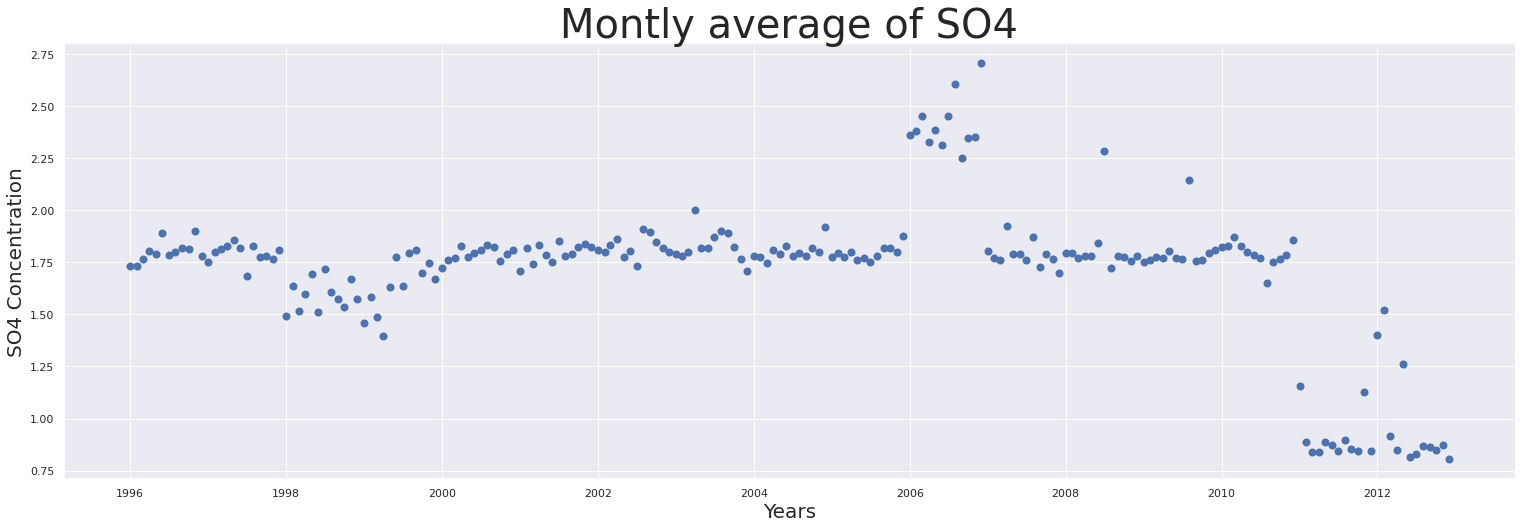

In [28]:
fig=plt.figure(figsize = (26,8))
plt.scatter(so4_monthly.index,so4_monthly["VALUE"], linewidths=2)
plt.ylabel("SO4 Concentration", fontsize = 20)
plt.xlabel("Years", fontsize = 20)
plt.title("Montly average of SO4", fontsize = 40)
plt.show()

## CHLORIDE

In [29]:
chloride = data_new[data["FIELDNAME"]=="CHLORIDE"]
chloride.set_index("SDATE", inplace = True)

<ipython-input-29-a8fd29396ebf>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chloride = data_new[data["FIELDNAME"]=="CHLORIDE"]


In [30]:
chloride_monthly = chloride.resample('MS').mean()

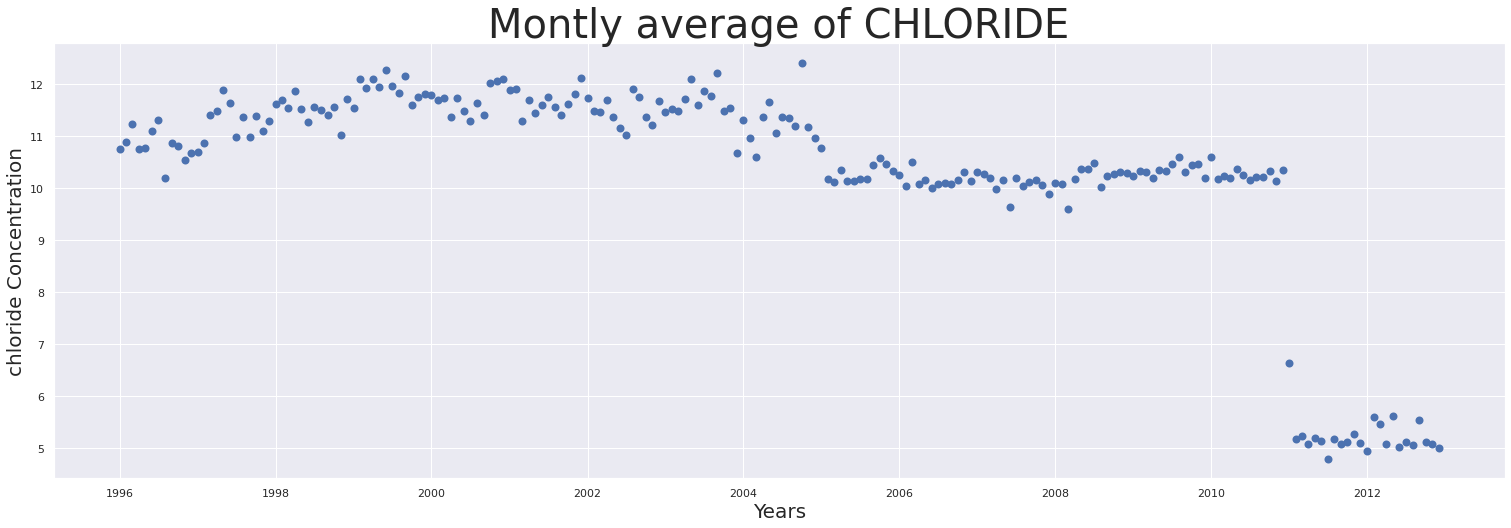

In [31]:
fig=plt.figure(figsize = (26,8))
plt.scatter(chloride_monthly.index,chloride_monthly["VALUE"], linewidths=2)
plt.ylabel("chloride Concentration", fontsize = 20)
plt.xlabel("Years", fontsize = 20)
plt.title("Montly average of CHLORIDE", fontsize = 40)
plt.show()

## ALUMINIUM

In [32]:
aluminium = data_new[data["FIELDNAME"]=="ALUMINIUM"]
aluminium.set_index("SDATE", inplace = True)

<ipython-input-32-445599b180da>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aluminium = data_new[data["FIELDNAME"]=="ALUMINIUM"]


In [33]:
aluminium_monthly = aluminium.resample('MS').mean()

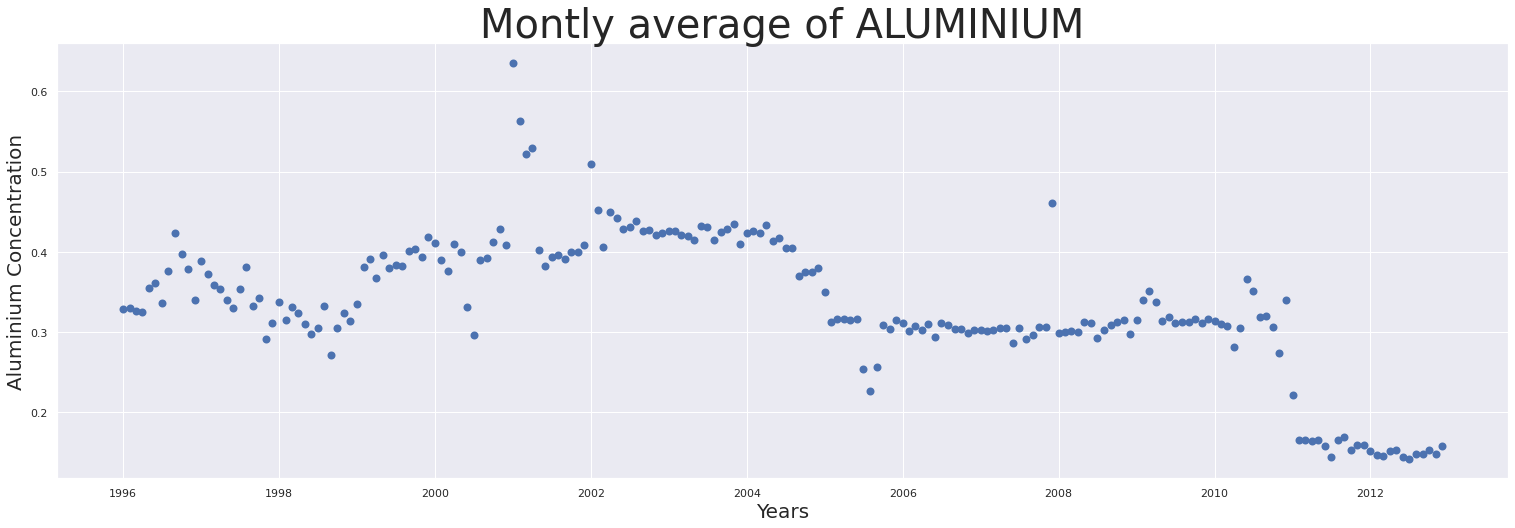

In [34]:
fig=plt.figure(figsize = (26,8))
plt.scatter(aluminium_monthly.index,aluminium_monthly["VALUE"], linewidths=2)
plt.ylabel("Aluminium Concentration", fontsize = 20)
plt.xlabel("Years", fontsize = 20)
plt.title("Montly average of ALUMINIUM", fontsize = 40)
plt.show()

## CALCIUM

In [35]:
calcium = data_new[data["FIELDNAME"]=="CALCIUM"]
calcium.set_index("SDATE", inplace = True)

<ipython-input-35-9783201c0f6e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  calcium = data_new[data["FIELDNAME"]=="CALCIUM"]


In [36]:
calcium_monthly = calcium.resample("MS").mean()

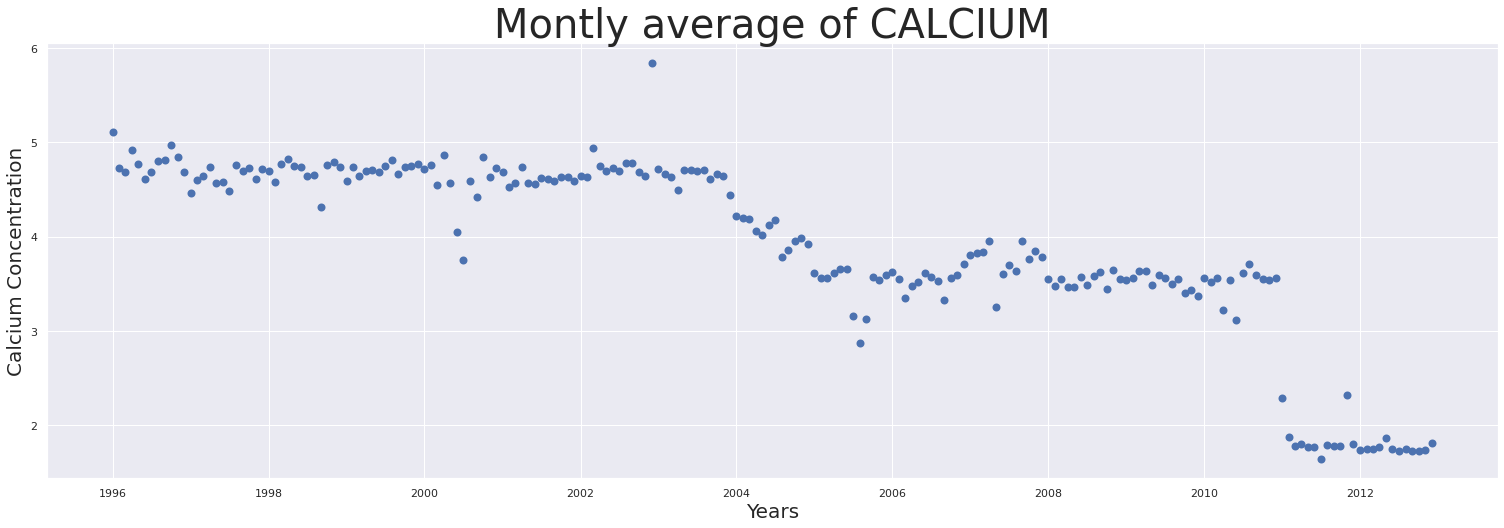

In [37]:
fig=plt.figure(figsize = (26,8))
plt.scatter(calcium_monthly.index,calcium_monthly["VALUE"], linewidths=2)
plt.ylabel("Calcium Concentration", fontsize = 20)
plt.xlabel("Years", fontsize = 20)
plt.title("Montly average of CALCIUM", fontsize = 40)
plt.show()

## CONDY *

In [38]:
condy = data_new[data["FIELDNAME"]=="CONDY"]
condy.set_index("SDATE", inplace = True)

<ipython-input-38-1b94c6401063>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  condy = data_new[data["FIELDNAME"]=="CONDY"]


In [39]:
condy_monthly = condy.resample("MS").mean()

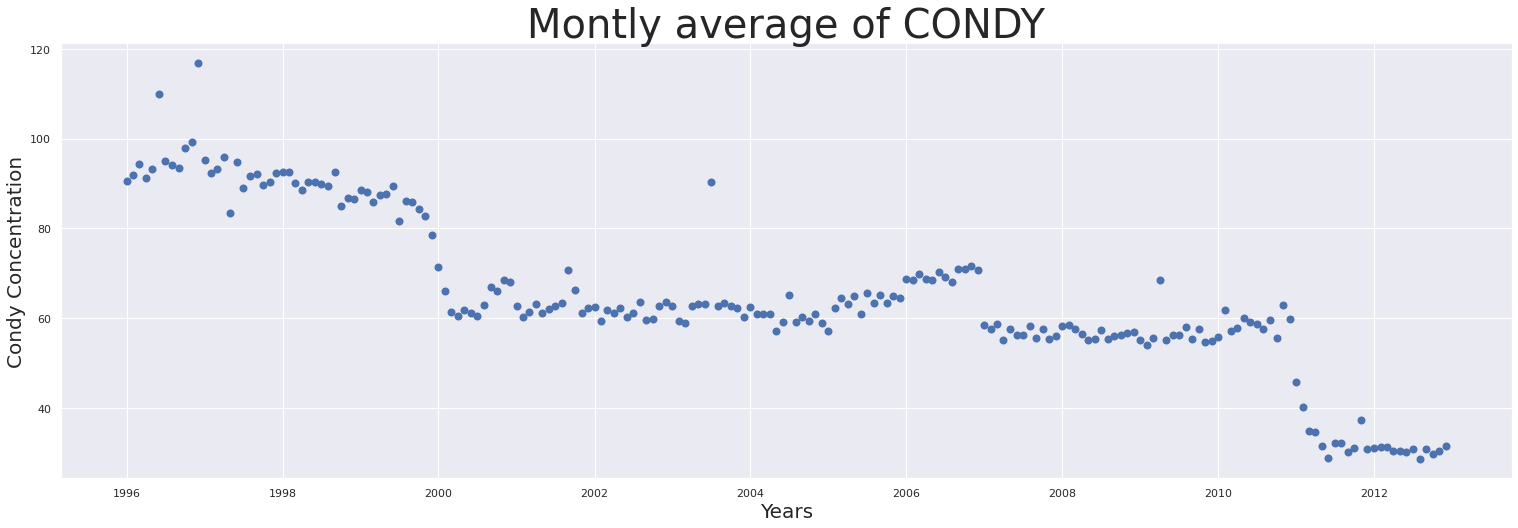

In [40]:
fig=plt.figure(figsize = (26,8))
plt.scatter(condy_monthly.index,condy_monthly["VALUE"], linewidths=2)
plt.ylabel("Condy Concentration", fontsize = 20)
plt.xlabel("Years", fontsize = 20)
plt.title("Montly average of CONDY", fontsize = 40)
plt.show()

## IRON

In [41]:
iron = data_new[data["FIELDNAME"]=="IRON"]
iron.set_index("SDATE", inplace = True)

<ipython-input-41-4c89e1ce7d04>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  iron = data_new[data["FIELDNAME"]=="IRON"]


In [42]:
iron_monthly = iron.resample("MS").mean()

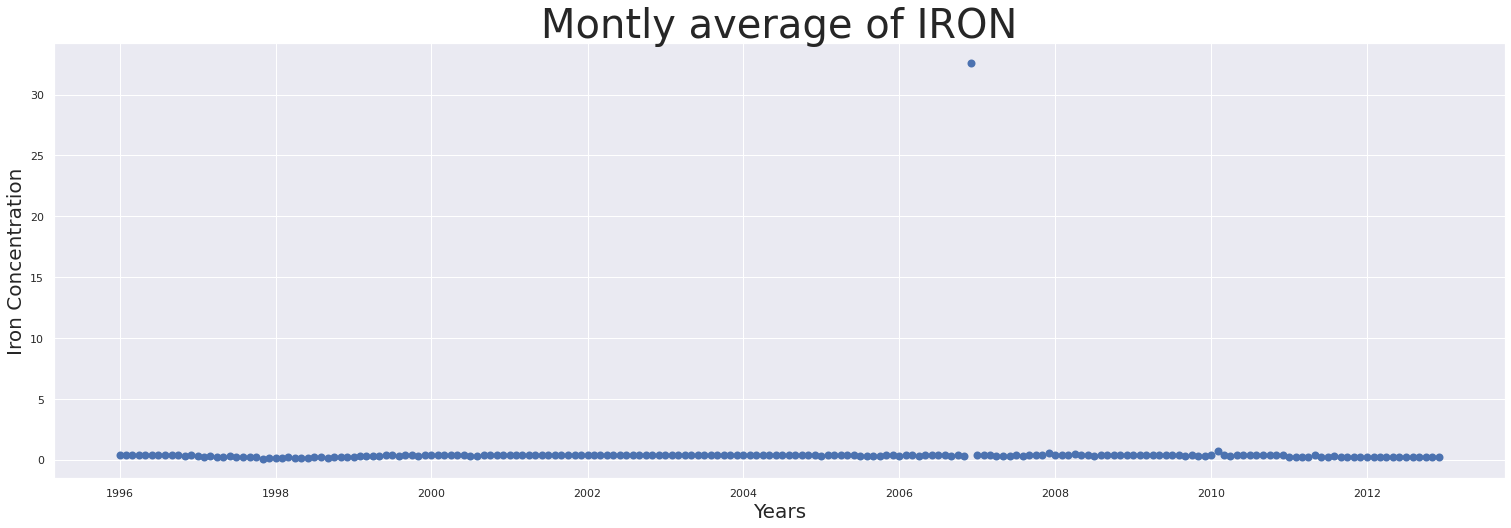

In [43]:
fig=plt.figure(figsize = (26,8))
plt.scatter(iron_monthly.index,iron_monthly["VALUE"], linewidths=2);
plt.ylabel("Iron Concentration", fontsize = 20)
plt.xlabel("Years", fontsize = 20)
plt.title("Montly average of IRON", fontsize = 40);
plt.show()

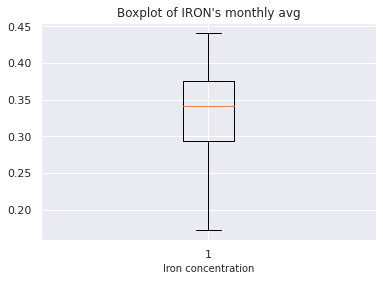

In [44]:
plt.boxplot(iron_monthly["VALUE"], showfliers=False)
plt.title("Boxplot of IRON's monthly avg", fontsize = 12)
plt.xlabel("Iron concentration", fontsize = 10)
plt.show()

## DOC

In [45]:
doc = data_new[data["FIELDNAME"]=="DOC"]
doc.set_index("SDATE", inplace = True)

<ipython-input-45-96005a7de927>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  doc = data_new[data["FIELDNAME"]=="DOC"]


In [46]:
doc_monthly = doc.resample("MS").mean()

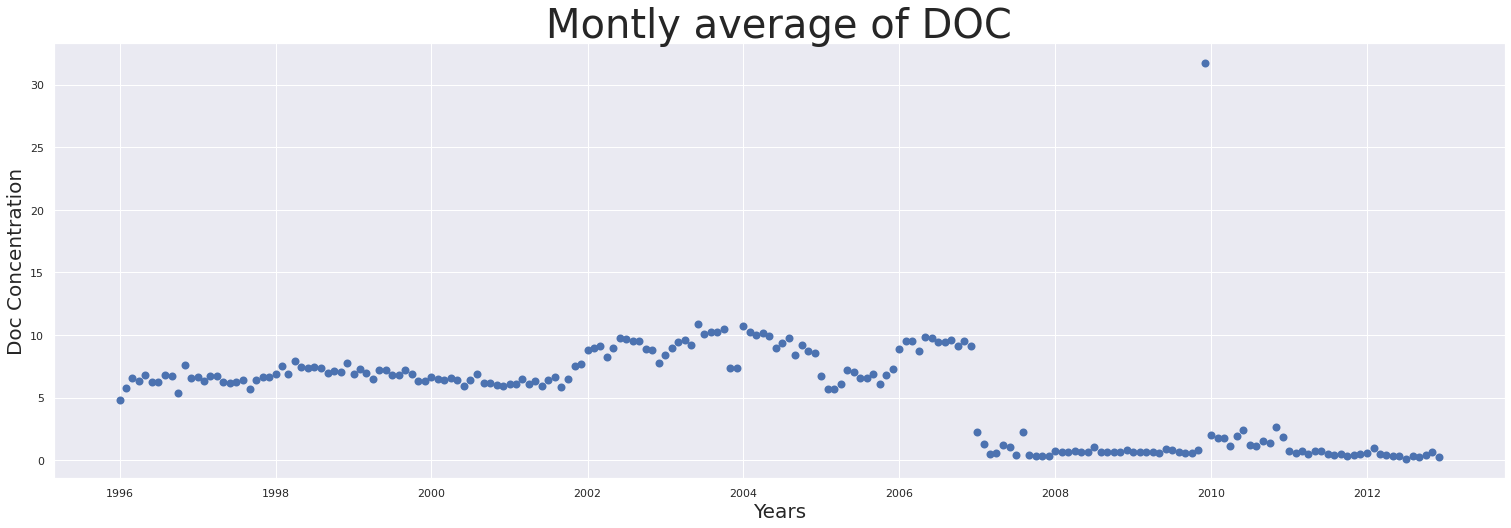

In [47]:
fig=plt.figure(figsize = (26,8))
plt.scatter(doc_monthly.index,doc_monthly["VALUE"], linewidths=2)
plt.ylabel("Doc Concentration", fontsize = 20)
plt.xlabel("Years", fontsize = 20)
plt.title("Montly average of DOC", fontsize = 40)
plt.show()

## MAGNESIUM

In [48]:
magnesium = data_new[data["FIELDNAME"]=="MAGNESIUM"]
magnesium.set_index("SDATE", inplace = True)

<ipython-input-48-62703b4610db>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  magnesium = data_new[data["FIELDNAME"]=="MAGNESIUM"]


In [49]:
magnesium_monthly = magnesium.resample("MS").mean()

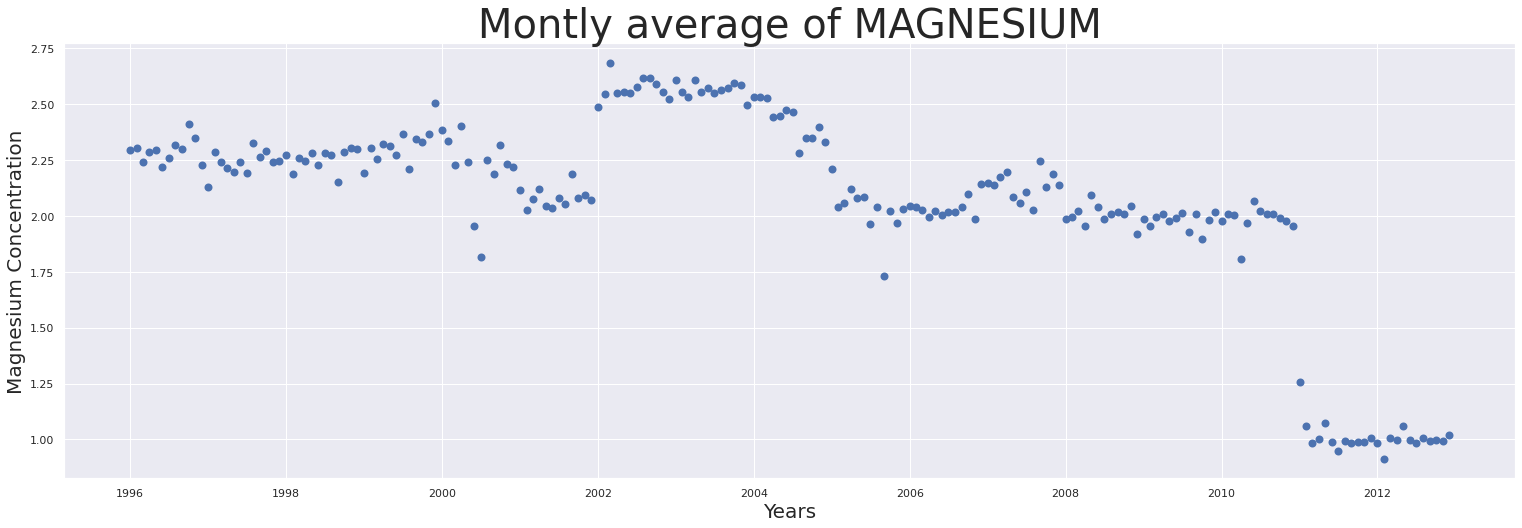

In [50]:
fig=plt.figure(figsize = (26,8))
plt.scatter(magnesium_monthly.index,magnesium_monthly["VALUE"], linewidths=2);
plt.ylabel("Magnesium Concentration", fontsize = 20)
plt.xlabel("Years", fontsize = 20)
plt.title("Montly average of MAGNESIUM", fontsize = 40);
plt.show()

In [51]:
data_new["FIELDNAME"].unique()

array(['ALUMINIUM', 'CALCIUM', 'CHLORIDE', 'CONDY', 'DOC', 'IRON',
       'MAGNESIUM', 'NH4N', 'NO3N', 'PH', 'PO4P', 'POTASSIUM', 'SO4S',
       'SODIUM', 'TOTALN', 'Q1', 'Q2', 'ALKY', 'PHAQCS', 'PHAQCU',
       'TOTALP', 'COLOUR'], dtype=object)

In [52]:
nh4n = data_new[data["FIELDNAME"]=="NH4N"]
nh4n.set_index("SDATE", inplace = True)

<ipython-input-52-831a50ce1c9a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nh4n = data_new[data["FIELDNAME"]=="NH4N"]


In [53]:
nh4n_monthly = nh4n.resample("MS").mean()

In [54]:
no3n = data_new[data["FIELDNAME"]=="NO3N"]
no3n.set_index("SDATE", inplace = True)

<ipython-input-54-d36920254e5b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no3n = data_new[data["FIELDNAME"]=="NO3N"]


In [55]:
no3n_monthly = no3n.resample("MS").mean()

In [56]:
ph = data_new[data["FIELDNAME"]=="PH"]
ph.set_index("SDATE", inplace = True)

<ipython-input-56-8ccee6790d14>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ph = data_new[data["FIELDNAME"]=="PH"]


In [57]:
ph_monthly = ph.resample("MS").mean()

In [58]:
po4p = data_new[data["FIELDNAME"]=="PO4P"]
po4p.set_index("SDATE", inplace = True)

<ipython-input-58-463379e0b047>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  po4p = data_new[data["FIELDNAME"]=="PO4P"]


In [59]:
po4p_monthly = po4p.resample("MS").mean()

In [60]:
k = data_new[data["FIELDNAME"]=="POTASSIUM"]
k.set_index("SDATE", inplace = True)

<ipython-input-60-671a01080e88>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k = data_new[data["FIELDNAME"]=="POTASSIUM"]


In [61]:
k_monthly = k.resample("MS").mean()

In [62]:
sodium = data_new[data["FIELDNAME"]=="SODIUM"]
sodium.set_index("SDATE", inplace = True)

<ipython-input-62-1b6b4da35ca1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sodium = data_new[data["FIELDNAME"]=="SODIUM"]


In [63]:
sodium_monthly = sodium.resample("MS").mean()

In [64]:
totaln = data_new[data["FIELDNAME"]=="TOTALN"]
totaln.set_index("SDATE", inplace = True)

<ipython-input-64-9b4a90a8816b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  totaln = data_new[data["FIELDNAME"]=="TOTALN"]


In [65]:
totaln_monthly = totaln.resample("MS").mean()

In [66]:
totalp = data_new[data["FIELDNAME"]=="TOTALP"]
totalp.set_index("SDATE", inplace = True)

<ipython-input-66-8e652764acdc>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  totalp = data_new[data["FIELDNAME"]=="TOTALP"]


In [67]:
totalp_monthly = totalp.resample("MS").mean()

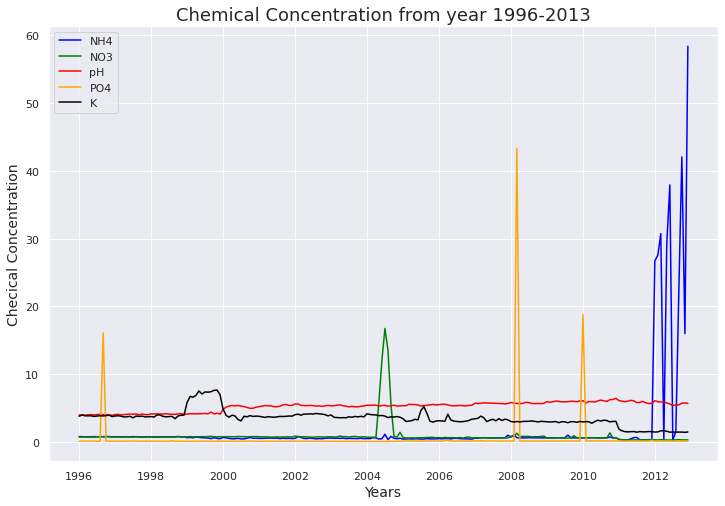

In [68]:
fig=plt.figure(figsize = (12,8))
ax=fig.add_subplot()

ax.plot(nh4n_monthly.index,nh4n_monthly["VALUE"],c='blue',ls='-',label="NH4")
ax.plot(no3n_monthly.index,no3n_monthly["VALUE"],c='green',ls='-',label="NO3")
ax.plot(ph_monthly.index,ph_monthly["VALUE"],c='red',ls='-',label="pH")
ax.plot(po4p_monthly.index,po4p_monthly["VALUE"],c='orange',ls='-',label="PO4")
ax.plot(k_monthly.index,k_monthly["VALUE"],c='black',ls='-',label="K")
ax.legend()
ax.set_xlabel("Years", fontsize=14)
ax.set_ylabel("Checical Concentration", fontsize=14)
ax.set_title("Chemical Concentration from year 1996-2013", fontsize=18)
plt.show()

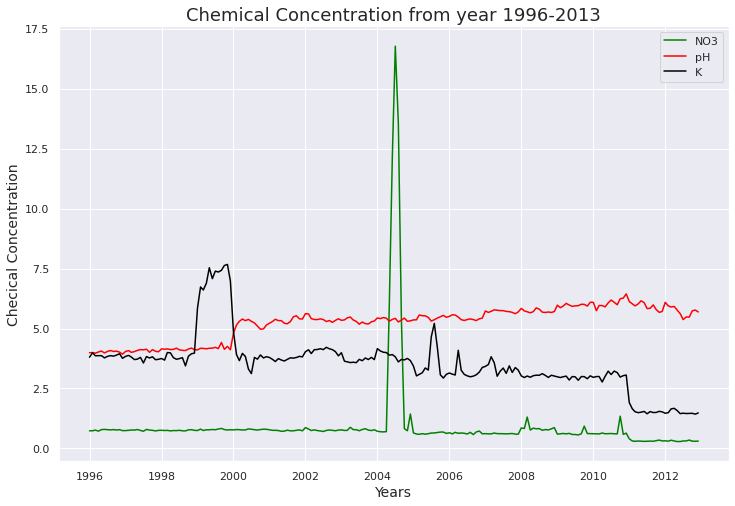

In [69]:
fig=plt.figure(figsize = (12,8))
ax=fig.add_subplot()

ax.plot(no3n_monthly.index,no3n_monthly["VALUE"],c='green',ls='-',label="NO3")
ax.plot(ph_monthly.index,ph_monthly["VALUE"],c='red',ls='-',label="pH")
ax.plot(k_monthly.index,k_monthly["VALUE"],c='black',ls='-',label="K")
ax.legend()
ax.set_xlabel("Years", fontsize=14)
ax.set_ylabel("Checical Concentration", fontsize=14)
ax.set_title("Chemical Concentration from year 1996-2013", fontsize=18)
plt.show()

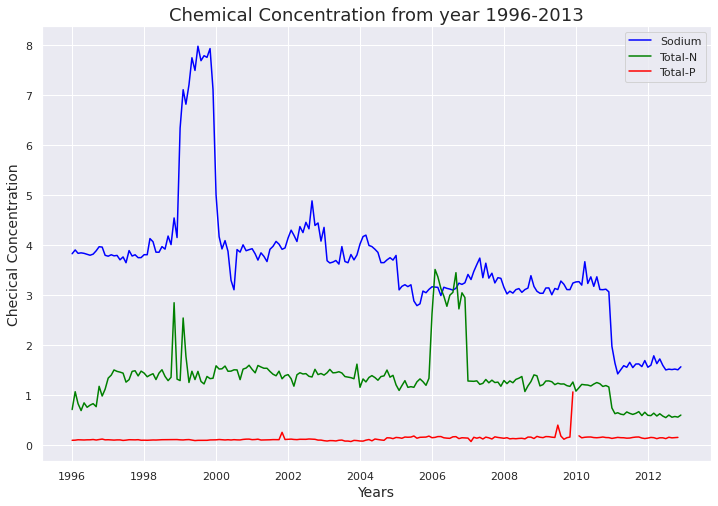

In [70]:
fig=plt.figure(figsize = (12,8))
ax=fig.add_subplot()

ax.plot(sodium_monthly.index,sodium_monthly["VALUE"],c='blue',ls='-',label="Sodium")
ax.plot(totaln_monthly.index,totaln_monthly["VALUE"],c='green',ls='-',label="Total-N")
ax.plot(totalp_monthly.index,totalp_monthly["VALUE"],c='red',ls='-',label="Total-P")
ax.legend()
ax.set_xlabel("Years", fontsize=14)
ax.set_ylabel("Checical Concentration", fontsize=14)
ax.set_title("Chemical Concentration from year 1996-2013", fontsize=18)
plt.show()

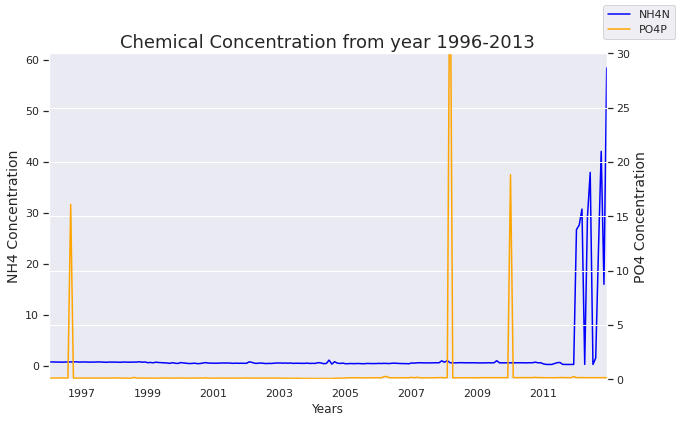

In [71]:
fig=plt.figure(figsize = (10,6))


ax2=nh4n_monthly["VALUE"].plot(c='blue',ls='-',label="NH4N")
ax1=po4p_monthly["VALUE"].plot(c="orange",ls="-", secondary_y=True,label="PO4P")
ax1.set_ylim(0,30)
fig.legend()
ax2.set_ylabel("NH4 Concentration",fontsize=14)
ax1.set_ylabel("PO4 Concentration", fontsize=14)
plt.title("Chemical Concentration from year 1996-2013", fontsize=18)
ax2.set_xlabel("Years")
plt.show()

<AxesSubplot:xlabel='FIELDNAME', ylabel='VALUE'>

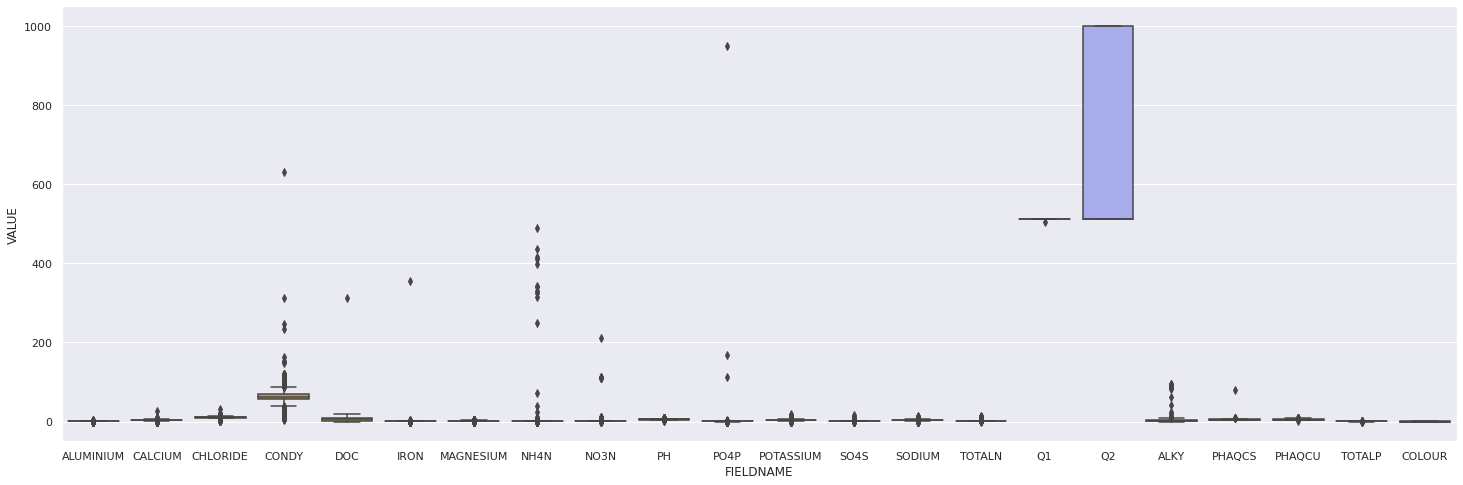

In [72]:
fig = plt.figure(figsize=(25,8))
sns.boxplot(x="FIELDNAME",y="VALUE",data=data_new)

Above box plot is according to the field name and value of the data. It is very difficult to extract the information from the above plot. However, in order to see the better view of the box plot, we are excluding extreme values. Glance to the box plots, seems like extreme value as above 100. Below boxplot shows according to the values less than 100 and except the outliers. This makes our plot view clear to retrive information.

<AxesSubplot:xlabel='FIELDNAME', ylabel='VALUE'>

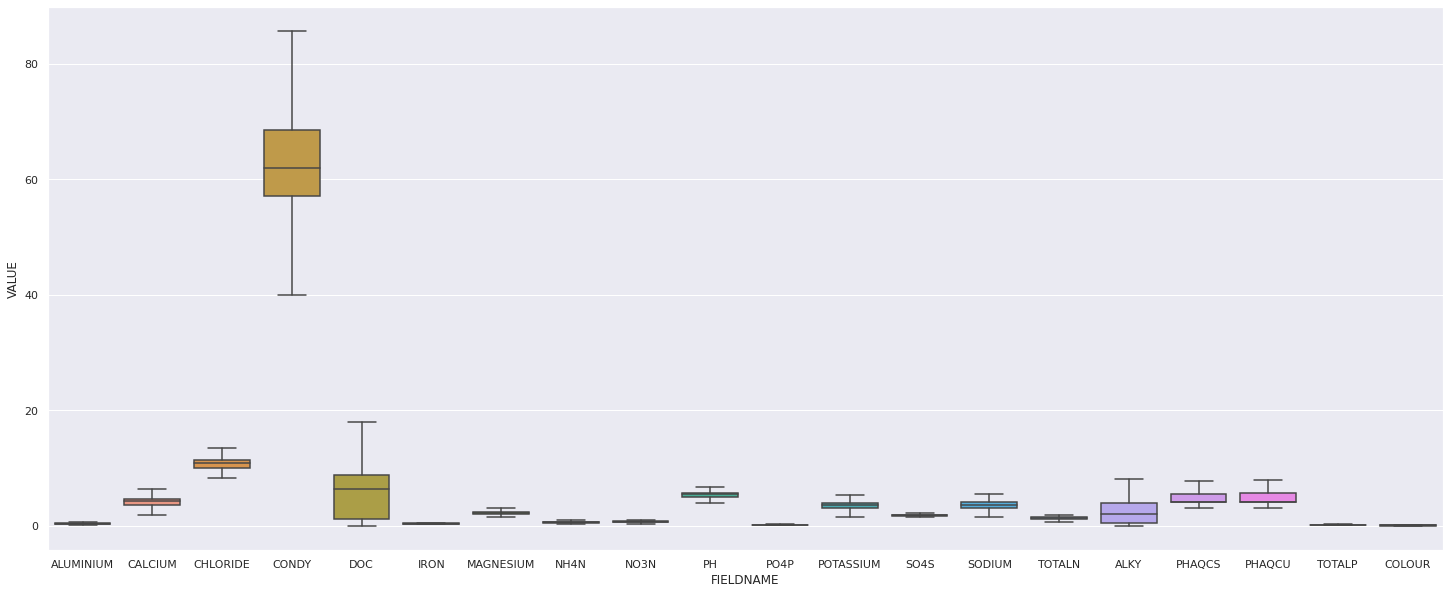

In [73]:
fig = plt.figure(figsize=(25,10))
sns.boxplot(x="FIELDNAME",y="VALUE",data=data_new[data_new["VALUE"]<100],showfliers=False)

It looks like, most of the field values are within the range of 0 to 10. The range of field value for CONDY and DOC is greater than other field values. Therefore interpreting it's quartile and median values is easier than others. Even-though the figure is clear, this figure might mislead because of excluded value of NH4N. Our plot for the NH4N shows that, there was sudden increase in the concentration of NH4 after year 2012. Since, we put our values limit less than 100, it is obvious for the false interpretaion for the box plot of NH4N. 

In [74]:
data_new.FIELDNAME.unique()

array(['ALUMINIUM', 'CALCIUM', 'CHLORIDE', 'CONDY', 'DOC', 'IRON',
       'MAGNESIUM', 'NH4N', 'NO3N', 'PH', 'PO4P', 'POTASSIUM', 'SO4S',
       'SODIUM', 'TOTALN', 'Q1', 'Q2', 'ALKY', 'PHAQCS', 'PHAQCU',
       'TOTALP', 'COLOUR'], dtype=object)

# Stations Interpretation

In [75]:
data_new.columns

Index(['SITECODE', 'SDATE', 'FIELDNAME', 'VALUE'], dtype='object')

In [76]:
data_clean = data_new[data_new["FIELDNAME"]!=("Q1" or "Q2" or "ALKY" or "COLOUR")]

In [77]:
print(data_new.shape)
print(data_clean.shape)

(59470, 4)
(59455, 4)


In [78]:
data_clean.set_index("SDATE", drop=True, inplace=True)

In [79]:
data_clean

,SITECODE,FIELDNAME,VALUE
SDATE,,,
1996-01-17,T01,ALUMINIUM,0.288
1996-01-17,T01,CALCIUM,5.170
1996-01-17,T01,CHLORIDE,7.900
1996-01-17,T01,CONDY,87.000
1996-01-17,T01,DOC,8.500
...,...,...,...
2010-01-20,T11,PO4P,0.134
2010-01-20,T11,POTASSIUM,2.960
2010-01-20,T11,SO4S,1.977


In [80]:
station_data = data_clean.groupby("SITECODE").mean()

In [81]:
station_data

,VALUE
SITECODE,
T01,7.349679
T02,7.003404
T03,9.348753
T04,5.612151
T05,3.596565
T06,6.861849
T07,6.781458
T08,7.275818
T09,6.834397


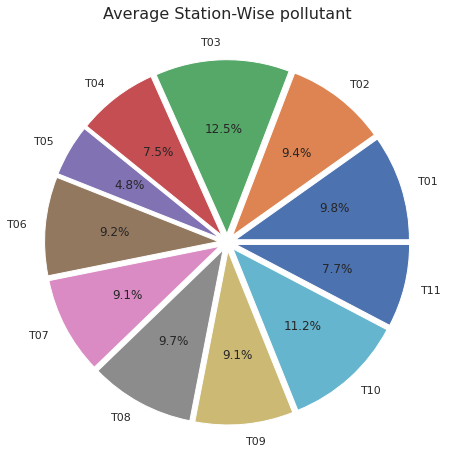

In [91]:
# change the error of "x must be 1D" if happening
pie = plt.figure(figsize=(14,8))
ax=plt.subplot()
labels=station_data.index
plt.pie(x=station_data.values.flatten(),labels=labels, autopct= "%.1f%%", explode=[0.05]*11, pctdistance=0.6)
# original code: plt.pie(x=station_data,labels=labels, autopct= "%.1f%%", explode=[0.05]*11, pctdistance=0.6)
plt.title("Average Station-Wise pollutant", fontsize=16)
plt.show()

In order to check which station is more pollutant firstly, we set the definition of pollutant as the average of total pollutant for the each station. Doing so, we found that highest poluted station is station T03 that take 12.5% of average total pollutant. In the contrary, Least average pollutant is observed in station T05 which takes 4.8% of average total pollutant. Meanwhile, other station's pollution is observed through the above piechart.

# Yearly observation of pollution

In [ ]:
yearly_pollution = data_clean.resample("YS").mean()

In [ ]:
fig = plt.figure(figsize=(14,6))
plt.plot(yearly_pollution.index,yearly_pollution["VALUE"], marker=5, c = "red")
plt.xlabel("Years", fontsize=14)
plt.ylabel("Pollution", fontsize=14)
plt.title("Average Yearly Pollutant Concentration", fontsize = 16)
plt.show()


According to the graph, if we consider the base year 1996, we found that the average acidic decomposion to the ecosystem throughout the year is in decresing trend. The highest average pollutants were measure in 1996 which was around 10.3. Similarly, lowest was measured in year 2011, where the value was around 3.37. At the year 2012 the value was added with slight increament and reach approximately 4.7.